In [1]:
import pandas as pd
from numpy import *
from sklearn import preprocessing
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import neighbors
import seaborn as sns

In [2]:
data=pd.read_csv('dataset.csv')
array=data.values
data

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
704,Female,20,4,5,6,6,1,responsible
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious
707,Male,19,5,6,5,7,5,extraverted


In [3]:
data[data['Gender']=="Male"]

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
5,Male,18,5,7,7,6,4,lively
8,Male,18,5,7,5,6,7,dependable
10,Male,19,6,7,5,6,3,serious
...,...,...,...,...,...,...,...,...
701,Male,21,5,6,2,7,4,responsible
703,Male,17,5,5,7,6,5,lively
705,Male,18,6,3,1,5,5,dependable
706,Male,22,5,2,3,6,1,serious


In [4]:
data["Personality (Class label)"].unique()

array(['extraverted', 'serious', 'dependable', 'lively', 'responsible'],
      dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Personality (Class label)', ylabel='count'>

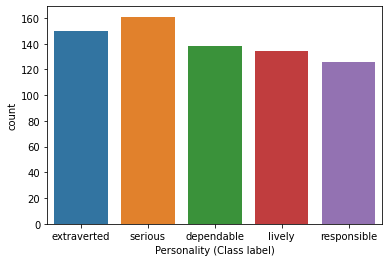

In [5]:
sns.countplot(data["Personality (Class label)"])

<AxesSubplot:>

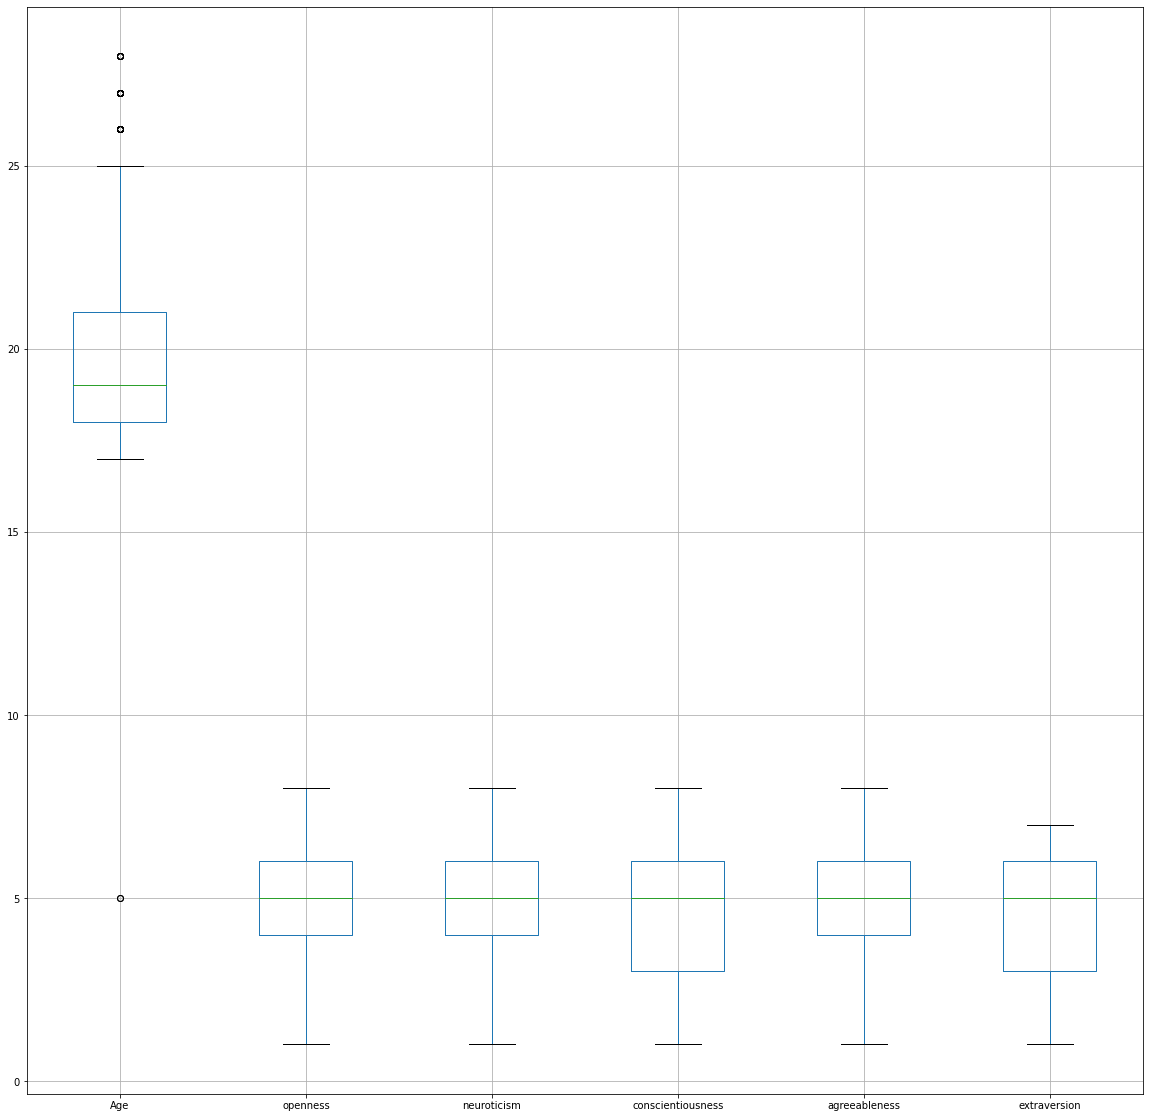

In [6]:
data.boxplot(figsize=(20,20))

In [7]:
drop_columns=["Personality (Class label)"]
X=data.drop(drop_columns,axis=1)
for i in range(len(array)):
    if X['Gender'][i]=="Male":
        X['Gender'][i]=1
    else:
        X['Gender'][i]=0
y=data['Personality (Class label)']

<ipython-input-7-957c19e9368a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'][i]=1
<ipython-input-7-957c19e9368a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'][i]=0


In [8]:
X

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,1,17,7,4,7,3,2
1,1,19,4,5,4,6,6
2,0,18,7,6,4,5,5
3,0,22,5,6,7,4,3
4,0,19,7,4,6,5,4
...,...,...,...,...,...,...,...
704,0,20,4,5,6,6,1
705,1,18,6,3,1,5,5
706,1,22,5,2,3,6,1
707,1,19,5,6,5,7,5


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

In [10]:
lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', solver='newton-cg')

In [11]:
y_pred=lr.predict(X_test)

In [12]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)

[[ 1  6  6  1  8]
 [ 3  9  7  6  3]
 [ 1  5  3  9 16]
 [ 3  1  4  5 12]
 [ 2  6  5  8 12]]


In [13]:
print('Accuracy Score on confusion_matrix: ' ,metrics.accuracy_score(y_test, y_pred))
print('Error rate on confusion_matrix: ' ,1-metrics.accuracy_score(y_test, y_pred))

Accuracy Score on confusion_matrix:  0.2112676056338028
Error rate on confusion_matrix:  0.7887323943661972


In [14]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf',degree=4,gamma=0.110,max_iter=100,decision_function_shape='ovo') 
print("The model:\n", pd.DataFrame.from_dict(clf.get_params(),orient ='index'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))

The model:
                              0
C                          1.0
break_ties               False
cache_size                 200
class_weight              None
coef0                      0.0
decision_function_shape    ovo
degree                       4
gamma                     0.11
kernel                     rbf
max_iter                   100
probability              False
random_state              None
shrinking                 True
tol                      0.001
verbose                  False




[[ 8  4  3  1  6]
 [ 9  6  6  3  4]
 [ 8  6  8  5  7]
 [10  3  4  2  6]
 [ 7  3  9  4 10]]
              precision    recall  f1-score   support

  dependable       0.19      0.36      0.25        22
 extraverted       0.27      0.21      0.24        28
      lively       0.27      0.24      0.25        34
 responsible       0.13      0.08      0.10        25
     serious       0.30      0.30      0.30        33

    accuracy                           0.24       142
   macro avg     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[ 6  4  3  3  6]
 [ 4  9  8  3  4]
 [ 5  6  8  5 10]
 [ 5  6  4  5  5]
 [ 4  4  8  4 13]]
              precision    recall  f1-score   support

  dependable       0.25      0.27      0.26        22
 extraverted       0.31      0.32      0.32        28
      lively       0.26      0.24      0.25        34
 responsible       0.25      0.20      0.22        25
     serious       0.34      0.39      0.37        33

    accuracy                           0.29       142
   macro avg       0.28      0.28      0.28       142
weighted avg       0.29      0.29      0.29       142

Accuracy of model: 28.87323943661972%


In [16]:
??RandomForestClassifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 1000) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[ 7  7  1  3  4]
 [ 5  8  5  6  4]
 [ 9  1 12  3  9]
 [ 4  5  5  3  8]
 [ 8  3  9  4  9]]
              precision    recall  f1-score   support

  dependable       0.21      0.32      0.25        22
 extraverted       0.33      0.29      0.31        28
      lively       0.38      0.35      0.36        34
 responsible       0.16      0.12      0.14        25
     serious       0.26      0.27      0.27        33

    accuracy                           0.27       142
   macro avg       0.27      0.27      0.27       142
weighted avg       0.28      0.27      0.27       142

Accuracy of model: 27.464788732394368%


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
clf =  GradientBoostingClassifier(n_estimators = 1000) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_pred)
print("\n\n\n")
print(confusion)
print(metrics.classification_report(y_test, y_pred))
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of model: {}%".format(accuracy*100))





[[ 4  6  5  3  4]
 [ 3 11  7  3  4]
 [ 5  5 10  3 11]
 [ 6  6  3  5  5]
 [ 6  7  8  4  8]]
              precision    recall  f1-score   support

  dependable       0.17      0.18      0.17        22
 extraverted       0.31      0.39      0.35        28
      lively       0.30      0.29      0.30        34
 responsible       0.28      0.20      0.23        25
     serious       0.25      0.24      0.25        33

    accuracy                           0.27       142
   macro avg       0.26      0.26      0.26       142
weighted avg       0.27      0.27      0.27       142

Accuracy of model: 26.76056338028169%
